<a href="https://colab.research.google.com/github/LotaSchwager/ADA-Informes/blob/main/Informe_CuttingRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informe Corte de varillas

## 1. Descripción del problema

Una empresa vende **varillas de metal**, pero se necesita saber cuantos cortes son necesarios para que la varilla de largo n obtenga el máximo valor posible a partir de esa varilla.

**Problema corte de varillas**:

**Entrada**: Largo de varilla $n$ y un arreglo de precios por cada medida $i=[1,n]$

**Salida**: Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

Para resolver este problema veremos 2 formas:

* Recursividad (Top-Down)
* Programación Dinámica (Bottom-Up)

## 2. Programación dinámica

Igual que el paradigma divide y vencerás visto en anteriores informes, la 
programación dinámica resuelve problemas dividiendo el problema en sub-problemas, al resolver estos sub-problemas resuelve el problema principal.

Las técnicas de programación dinámica se aplican cuando los sub-problemas se cruzan, es decir, los sub-problemas tiene un sub-sub-problema en común y es conveniente resolver una vez este sub-sub-problema y almacenar los resultados así evitando calcular ese mismo sub-sub-problema cada vez que se esté resolviendo un sub-problema.

Paradigma de diseño: **Programación dinámica**

* Identificar los posibles sub-problemas.

* Usar estos sub-problemas para resolver problemas más grande de manera 
  **correcta**.

* Resolver el problema principal de manera rápida y correcta usando los 
  sub-problemas resueltos.

## 2.1 Forma Recursiva (Top-Down)

Este algoritmo soluciona el problema calculando todos los casos posibles de como cortar una varilla de tamaño n, y retorna el mayor valor de todas las posibilidades existentes.

Por ejemplo tomemos el caso para $n = 3$, siendo $2^{n-1}$ las posibilidades para un largo n, por ende para un $n = 3$ hay $4$ posibilidades que resolver.

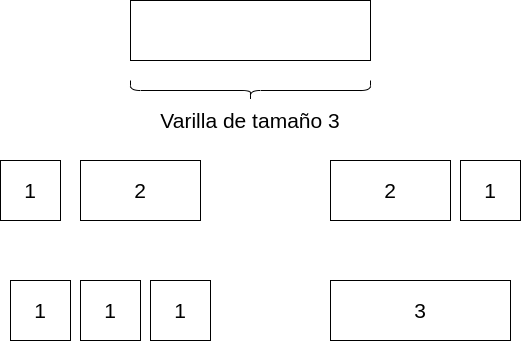

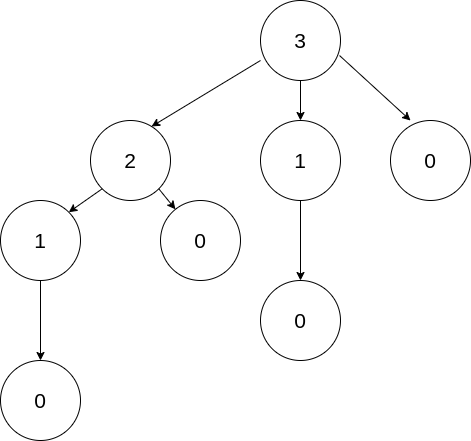

Siendo esta la una forma de verlo los pasos que realiza el algoritmo para resolver este problema y es que se puede ver como el algoritmo a veces soluciona un problema que ya resolvió con anterioridad, provocando que resuelva de nuevo el mismo sub-problema que ya realizo, siendo la razón por lo que este algoritmo se tarde más que el otro que presentaremos más adelante.

## 2.2 Estructura de una solucion óptima

Si observamos detenidamente en el problema, podremos observar que para cada largo tiene un valor máximo por lo que podemos encontrar el valor máximo $p_n$ para un largo n obteniendo la suma del precio $p_i$ más el valor máximo $r_{n-i}$. 

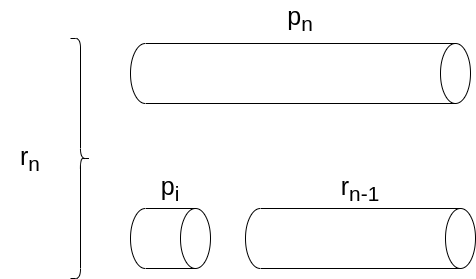

$r_{n-1}$ es el valor maximo para cuando el largo de la varilla es $n-1$.

Miremos el pseudocódigo, para encontrar el valor máximo:

```
funtion cut_rod (precio, largo):
    
    //Caso base -> retorna 0
    if largo <= 0 :
         return 0
    
    //Le añade un valor muy pequeño al max_value
    max_value = (numero pequeño y negativo)
    
    //Recorre el largo de la varilla
    for i in range (0, largo)
       
       //Compara si el max_value con el precio del nuevo corte
       //Si el precio nuevo es mas alto sera el nuevo valor de max_value
       max_value = max (max_value, precio[i]+cut_rod(precio, largo - i - 1)

    //Retorna max_value con el maximo valor posible con un largo determinado
    return max_value     
``` 
Viendo en detalle el pseudocódigo:

* Nuestro caso base es cuando el largo es menor o igual a 0 y en ese caso 
  retornaremos 0.

* Para cuando largo es distinto de 0 obtendremos, tenemos que recorrer el largo 
  completo de la varilla:
    
     * Buscar el máximo entre max_value y el valor máximo de n - i (utilizando 
       recursión)


* Se retorna el mayor valor

Eso significa que el valor mayor vendrá de:

$r_n$ = max ( $p_i$ + cut_rod($r_{n-i}$) ), teniendo que i recorre desde 0 hasta el largo de la varilla, como también se tiene que considerar que $r_0 = 0$.

#### Tiempo de ejecución

Teniendo en cuenta que para el caso base tenemos.

$$T(0) = 1$$

Para caso de largo n tenemos que.

$$T(n) = \sum_{i=0}^{n-1} T(i) $$

Como la recursividad resuelve cada caso posible para cortar una varilla de largo n tenemos que esa cantidad de posibilidades es $2^{n-1}$

Siendo esta la razon por la que el tiempo de ejecucion de este algoritmo es

$$O(n) = 2^n$$

### 2.3 Ejemplo Top-Down

sí tenemos los siguientes precios:

precio = [ 1, 5, 8, 9, 10, 17, 17, 20 ]

largo de la varilla = 3

**Recursión** : 1

* Iteración en $i = 0$ con tamaño de la varilla **3**
* máximo valor = max_value o precio[ 0 ] + cutRod(2)

**Recursión** : 2

* Iteración en $i = 0$ con tamaño de la varilla **2**
* máximo valor = max_value o precio[ 0 ] + cutRod(1)

**Recursión** : 3

* Iteración en $i = 0$ con tamaño de la varilla **2**
* máximo valor = max_value o precio[ 0 ] + cutRod(0)

**Recursión** : 4

* Caso Base

Máximo valor = 1 de la varilla de largo **1**//Máximo valor de este caso

Máximo valor = 2 de la varilla de largo **2**

* Iteración en $i = 1$ con tamaño de la varilla **2**
* máximo valor = max_value o precio[ 1 ] + cutRod(0)

**Recursión** : 5

* Caso Base

Máximo valor = 5 de la varilla de largo **2**//Máximo valor de este caso

Máximo valor = 6 de la varilla de largo **3**

* Iteración en $i = 1$ con tamaño de la varilla **3**
* máximo valor = max_value o precio[ 1 ] + cutRod(1)

**Recursión** : 6

* Iteración en $i = 0$ con tamaño de la varilla **1**
* máximo valor = max_value o precio[ 0 ] + cutRod(0)

**Recursión** : 7

* Caso Base

Máximo valor = 1 de la varilla de largo **1**

Máximo valor = 6 de la varilla de largo **3**

* Iteración en $i = 2$ con tamaño de la varilla **3**
* máximo valor = max_value o precio[ 2 ] + cutRod(0)

**Recursión** : 8

* Caso Base

Máximo valor = 8 de la varilla de largo **3**//Máximo valor de este caso

retorna 8 como valor máximo

### 2.4 Bottom-up

Observando como Top-Down resuelve el problema, vemos que a veces resuelve el mismo sub-problema más de una vez como dijimos con el ejemplo.

Por eso buscaremos la forma solucionar el inconveniente de tener que resolver el mismo sub-problema más de una vez y para eso guardaremos los resultados de cada sub-problema en un arreglo auxiliar. Así, una vez se resuelva por primera vez el sub-problema guardaremos el valor y la siguiente vez que se necesite la solución del mismo sub-problema no tengamos que volverlo a calcular.

Para hacer esto también se modifica el orden, en Top-Down primero llamábamos recursivamente al largo - 1 y así sucesivamente del más grande al más pequeño, pero esta vez iremos desde el principio hasta llegar al largo.

Miremos el pseudocódigo:

```
funtion bottom_up_cutRod (precio , largo):
    
    //Arreglo auxliar para guardar los resultados de los sub-problemas
    value = [] 
    
    //Caso base
    value[0] = 0
    
    for j in range (1, largo):
          q = numero pequeño y negativo

          for i in range (1, j):
              
              q = max (q , precio[i] + value[j - i])

          value[j] = q

    return value[largo]          
```

Observando el algoritmo vemos que:

* Crea un arreglo auxliar para guardar las soluciones de los sub-problemas y lo 
  rellena el caso base con su respectivo valor.

* Recorre cada largo de la varilla hasta llegar al largo $n$ ( $j$ ).

  * Inicializa la variable q con un valor pequeño y negativo
  * Recorre cada caso del largo ( $j$ ):

    * q pasa a tener el valor maximo entre q y el arreglo auxiliar [$j$ - $i$]

  * arreglo auxiliar[$j$] tiene el valor maximo q

* Se retorna el valor maximo en arreglo auxiliar [ largo $n$ ]

En este algoritmo el arreglo auxiliar value almacena las soluciones de cada sub-problema, que son los valores máximos para cada largo hasta n, ya que al igual que Top-Down este algoritmo utiliza los valores máximos anteriores a n para resolverse, solo que esta vez cada resultado se guarda sumado a que se resuelve desde $r_0$, $r_1$, así hasta $r_n$.

### 2.5 Ejemplo Bottom-up

La misma entrada que en el ejemplo anterior:

precios = [ 1, 5, 8, 9, 10, 17, 17, 20 ]

largo de la varilla = 3

Entrando al for:

------------**Largo** $i = 1$:------------

max_val: -1

$precio[0] + values[0]$ = 1 es mayor que -1 ?
* Si por lo que se remplazan los valores

max_val = 1 (Se guarda en el arreglo auxiliar)

------------**Largo** $i = 2$:------------

max_val: 1

$precio[0] + values[1]$ = 2 es mayor que 1 ?
* Si por lo que se remplazan los valores

max_val = 2

$precio[1] + values[0]$ = 5 es mayor que 2 ?
* Si por lo que se remplazan los valores

max_val = 5 (Se guarda en el arreglo auxiliar)

------------**Largo** $i = 3$:------------

max_val = 5

$precio[ 0 ] + values[ 2 ]$ = 6 es mayor que max_val ?
* Si lo es por lo que se remplazan los valores

max_val = 6 

$precio[ 1 ] + values[ 1 ]$ = 6 es mayor que max_val ?
* No por lo que no pasa nada

Máximo valor guardado: 6

$precio[ 2 ] + values[ 0 ]$ = 8 es mayor que max_val ?
* Si lo es por lo que se remplazan los valores

max_val = 8 (Se guarda en el arreglo auxiliar)

------------Fin------------

Se retorna el valor 8

## 3.1 Implementación Top-Down

Implementación en Python añadiendo que retorna el valor máximo más el corte requerido para obtener ese valor máximo.

In [41]:
from termcolor import colored
recursividad = 0

def cutRod(price, n, verbose = False):
    global recursividad
    recursividad += 1
    if verbose == True:
        print (colored(f"\nRecursividad :", "blue"), colored(f"{recursividad}", "blue"),"\n")
        
    
    #Caso Base"
    if(n <= 0):
        if verbose == True:
            print ("\nCaso Base \n")
        return 0,0
    
    #Inicializa las variables 
    max_val = -1
    corte = - 1
    
    #Se recorre cada largo de la varilla hasta a n
    for i in range(0, n):

        if verbose == True:
            print ("i del for :", i, "Tamaño de la varilla :", n)
            print ("Maixmo valor entre max_value y price[",i,"] cutRod(", n - i - 1,")")
        
        #Se llama a la recursividad obteniendo el valor maximo anterior y el corte
        vall, aux = cutRod(price, n - i - 1, verbose)

        #Se compara para obtener el numero mayor
        if max_val < price[i] + vall:
            max_val = price[i] + vall
            #Se obteiene el corte
            corte = i + 1

        if verbose == True:
             print ("maximo valor :", max_val, "de una varilla de largo ",n,"\n") 
             print ("Corte requerido :", corte)

    if verbose == True:
        print (colored(f"\n----------------------Retorna----------------------\n", "red"))
        print ("Maximo Valor Final :", max_val , "de la varilla de largo ", n)
        print ("Corte Final :", corte)
        print (colored(f"\n---------------------------------------------------", "red"))
    
    #Se retorna el valor maximo y el corte
    return max_val, corte

# Driver code
prices = [1, 5, 8, 9, 10, 17, 17, 20,24,30]
size = len(prices)

print ("-----------Entrada-----------")
print ("Precios :", str(prices))
print ("Tamaño de la varilla :", size)
print ("-----------------------------\n")

maximo , corte = cutRod (prices, 9)

print ("Valor maximo es :", maximo)
print ("Corte requerido es :", corte)

-----------Entrada-----------
Precios : [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
Tamaño de la varilla : 10
-----------------------------

Valor maximo es : 25
Corte requerido es : 3


## 3.3 Implementación Bottom-up

Implementación en Python añadiendo que retorna el arreglo auxiliar con los n soluciones de los sub-problemas sumado a otro arreglo auxiliar que retorna los n cortes necesarios para tener ese máximo valor.

In [28]:
subProblemas = 0

def bottom_up(precio, largo, verbose = False):
    global subProblemas
    if verbose == True:
        print (colored(f"---------------Inicio---------------\n", "blue"))
    #Se crea 2 arreglos y se iniciaran con puros 0's
    values = [0 for x in range(largo+1)]
    corte = [0 for y in range(largo+1)]
    
    #Variable para comparar
    max_val = -1
    
    if verbose == True:
        print ("\nArreglo auxliar para los valores maximos :", str(values))
        print ("Arreglo auxliar para los cortes ", str(corte))

    #Se recorre de acuerdo al largo de la varilla.
    #Se empieza de 1 porque es la primera opcion de corte 
    for i in range(1, largo + 1):
        subProblemas += 1
        if verbose == True:
            print (colored(f"\n---------------Largo ", "blue"), colored(f"{i}", "blue"),colored (f"---------------", "blue"))
        #Se recorre el caso de largo i para j casos de corte
        for j in range(i):
            
            if verbose == True:
                print ("Maximo valor guardado :", max_val)
                print ("precio[",j,"] + values[",i - j - 1,"] = ",precio[j] + values[i - j - 1], " es mayor que max_val =", max_val,"?")

            
            #Se compara si es el valor maximo obtenido
            #En caso de serlo se guarda tanto el valor como el corte
            if max_val < precio[j] + values[i - j - 1]:
                max_val = precio[j] + values[i - j - 1]
                corte[i] = j + 1

                if verbose == True:
                    print ("Si lo es por lo que se remplazan los valores")
                    print ("max_val = ", max_val,"\nCorteNecesario = ",j+1)

            else:

                if verbose == True:
                    print ("No por lo que no ocurre nada.\n")    
        
        #Se añade el valor maximo obtenido 
        values[i] = max_val
     
    if verbose == True:
        print(colored(f"Se retorna el valor ", "red"), colored(f"{values[largo]}", "red")) 
        print (colored(f"------------------Fin------------------\n", "blue"))
    #Se retornan un arreglo de valores y otro de cortes
    return values, corte


def print_cuts(cuts, length):
    print ("Corte necesario para obtener ese valor maximo es : ", end = "")
    while length > 0:
        print(cuts[length], end=" ")
        length -= cuts[length]

precio = [1, 5, 8, 9, 10, 17, 17, 20,24,30]
length = 9
largete = [x for x in range(length + 1)]

print ("-----------Entrada-----------")
print ("Precios :", str(precio))
print ("Tamaño de la varilla :", length)
print ("-----------------------------\n")

max_value, cuts = bottom_up(precio, length)

print ("Valor maximo para el largo ", length, "es de :", max_value[length])
print_cuts(cuts, length)
print ("\nSub Problemas resueltos :" , subProblemas)

print ("\n\nTabla creada a partir de los arreglo auxiliares :\n")
print ("Largo:", str(largete))
print ("ValMax:", str(max_value))
print ("Corte:", str(cuts))

-----------Entrada-----------
Precios : [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
Tamaño de la varilla : 9
-----------------------------

Valor maximo para el largo  9 es de : 25
Corte necesario para obtener ese valor maximo es : 3 6 
Sub Problemas resueltos : 9


Tabla creada a partir de los arreglo auxiliares :

Largo: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ValMax: [0, 1, 5, 8, 10, 13, 17, 18, 22, 25]
Corte: [0, 1, 2, 3, 2, 2, 6, 1, 2, 3]


#### Precios para el verbose

In [4]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(1,10)
    A.append(prev+r)
    prev+=r
  return A

precio = cutrod_instance_generator(5)
print ("Precios :",str(precio))

Precios : [3, 12, 19, 21, 24]


### 3.2 Verbose == True: Top-Down


In [42]:
precios = [3, 12, 19, 21, 24]
largo = len(precios)
recursividad = 0
print ("-----------Entrada-----------")
print ("Precios :", str(precios))
print ("Tamaño de la varilla :", largo)
print ("-----------------------------\n")

maximo , corte = cutRod (precios, largo, True)

print ("Valor maximo es :", maximo)
print ("Corte requerido es :", corte)

-----------Entrada-----------
Precios : [3, 12, 19, 21, 24]
Tamaño de la varilla : 5
-----------------------------


Recursividad : 1 

i del for : 0 Tamaño de la varilla : 5
Maixmo valor entre max_value y price[ 0 ] cutRod( 4 )

Recursividad : 2 

i del for : 0 Tamaño de la varilla : 4
Maixmo valor entre max_value y price[ 0 ] cutRod( 3 )

Recursividad : 3 

i del for : 0 Tamaño de la varilla : 3
Maixmo valor entre max_value y price[ 0 ] cutRod( 2 )

Recursividad : 4 

i del for : 0 Tamaño de la varilla : 2
Maixmo valor entre max_value y price[ 0 ] cutRod( 1 )

Recursividad : 5 

i del for : 0 Tamaño de la varilla : 1
Maixmo valor entre max_value y price[ 0 ] cutRod( 0 )

Recursividad : 6 


Caso Base 

maximo valor : 3 de una varilla de largo  1 

Corte requerido : 1

----------------------Retorna----------------------

Maximo Valor Final : 3 de la varilla de largo  1
Corte Final : 1

---------------------------------------------------
maximo valor : 6 de una varilla de largo  2 

Co

### 3.4 Verbose == True bottom-up

In [29]:
precios = [3, 12, 19, 21, 24]
largo = len(precios)
largete = [x for x in range(largo + 1)]

print ("-----------Entrada-----------")
print ("Precios :", str(precios))
print ("Tamaño de la varilla :", largo)
print ("-----------------------------\n")

max_value, cuts = bottom_up(precios, largo, True)

print ("Valor maximo para el largo ", largo, "es de :", max_value[largo])
print_cuts(cuts, largo)

print ("\n\nTabla creada a partir de los arreglo auxiliares :\n")
print ("Largo:", str(largete))
print ("ValMax:", str(max_value))
print ("Corte:", str(cuts))

-----------Entrada-----------
Precios : [3, 12, 19, 21, 24]
Tamaño de la varilla : 5
-----------------------------

---------------Inicio---------------


Arreglo auxliar para los valores maximos : [0, 0, 0, 0, 0, 0]
Arreglo auxliar para los cortes  [0, 0, 0, 0, 0, 0]

---------------Largo  1 ---------------
Maximo valor guardado : -1
precio[ 0 ] + values[ 0 ] =  3  es mayor que max_val = -1 ?
Si lo es por lo que se remplazan los valores
max_val =  3 
CorteNecesario =  1

---------------Largo  2 ---------------
Maximo valor guardado : 3
precio[ 0 ] + values[ 1 ] =  6  es mayor que max_val = 3 ?
Si lo es por lo que se remplazan los valores
max_val =  6 
CorteNecesario =  1
Maximo valor guardado : 6
precio[ 1 ] + values[ 0 ] =  12  es mayor que max_val = 6 ?
Si lo es por lo que se remplazan los valores
max_val =  12 
CorteNecesario =  2

---------------Largo  3 ---------------
Maximo valor guardado : 12
precio[ 0 ] + values[ 2 ] =  15  es mayor que max_val = 12 ?
Si lo es por lo que se r

## 4. Correctitud

#### Teorema (correctitud del Bottom-up)

El algoritmo Bottom-up recibe un arreglo con los precios de cada longitud, y la 
longitud específica, retornando el valor máximo posible para esa longitud en específico.

**Caso Base**: se inicializa el arreglo auxiliar, y la posición 0 de ese arreglo tendrá valor 0.

**Caso general**: Se asume que los valores del arreglo auxiliar hasta $m-1$ son correctos, siendo $m < n$.

En un for de 0 hasta m - 1:

* Se pregunta si el max_val es menor que precio[ $i$ ] + arreglo auxiliar [$r_
{m-i}$]

* Si lo anterior es verdadero, se guarda el nuevo valor máximo en max_val, caso 
  que lo anterior sea falso no ocurre nada.

* Una vez salido del for se guarda el max_val en el arreglo auxiliar.

* Se sigue con el siguiente valor $m + 1$

Como asumimos que los $m - 1$ valores del arreglo auxiliar son correctos, tendremos certeza de que la formula para calcular el max_val es correcta para el caso de longitud $m$.

Con esto podemos confirmar que el algortimo Bottom-up es correcto.

## 5. Tiempo de ejecución del Buttom-up

La mayor diferencia entre el Bottom-up con el Top-Down es el orden en la que están los sub-problemas, sumados a que el Bottom-up guarda todos los resultados de los sub-problemas que va resolviendo. Por lo que su tiempo de ejecución no es el mismo que el de Top-Down.

Hay que tener en cuenta que este algoritmo no tiene un mejor o peor caso, a diferencia de los algoritmos de ordenamiento, este algoritmo requiere encontrar un valor fijo para un largo en específico a partir de un arreglo con los precios de cada longitud.

Viendo el algoritmo, esta contiene dos iteraciones for, una para recorrer cada longitud posible hasta llegar al tamaño que se quiere encontrar el valor máximo, mientras que el otro for recorre las posibilidades para cada largo de la varilla con la diferencia que no requerirá una recursión como Top-Down, ya que esta ira guardando cada resultado de los sub-problemas por lo que recorrerá
desde 1 hasta largo i determinado por el primer for.

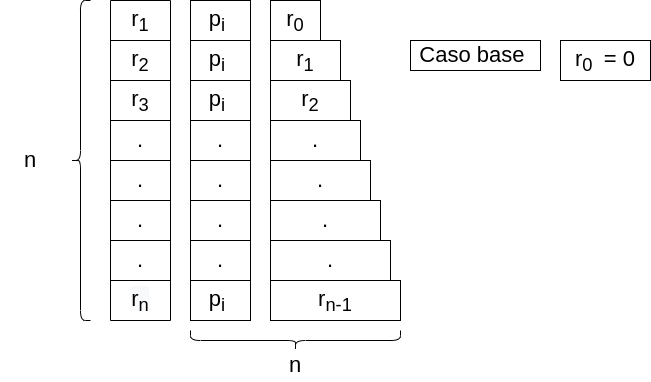

#### Tiempo de ejecución de los sub-problemas

El sub-problema en este caso es resolver cada valor máximo para los $n - 1$ longitudes anteriores

Para esto tiene que recorrer con un for el tamaño del sub-problema para calcular cada posibilidad e ir guardando cada vez que se encuentre un valor máximo, para eso obtenemos el siguiente función para el tiempo de ejecución de los sub-problemas.

$$S_p(n) = n + c$$

Siendo c una constante para guardar los valores respectivos y $n$ la cantidad de veces que tiene que recorrer para resolver los casos posibles.

El tiempo de ejecución de los sub-problemas es de $Θ(n)$

#### Tiempo de ejecución de los problema principal

Para determinar el tiempo de ejecución debemos saber cuantas veces tenemos que resolver estos sub-problemas y como vimos en la imagen tenemos que resolver 1 veces cada sub-problema, habiendo n sub-problemas a resolver obtenemos esto.

$$T(n) = n * S_p(n) + c$$

Siendo c una constante para guardar los valores respectivos y $n$ la cantidad de sub-problemas a resolver.

El tiempo de ejecución del Bottom-up es de $Θ(n^2)$.

### 5.1 Complejidad Espacial

Parte importante del algoritmo es almacenar los resultados de cada sub-problema y para eso hay que gastar memoria adicional. 

Por eso se crea un arreglo auxiliar con un tamaño equivalente al $largo + 1$, siendo este largo la proporción de la varilla que deseamos saber su valor máximo, por lo que si el largo de la varilla es n, la complejidad espacial del algoritmo será $O(n)$.

## 6. Experimentos


### 6.1 Top-Down vs Bottom-up

Para este experimento compararemos los dos algoritmos descritos anteriormente, teniendo en cuenta lo siguiente.

**Tiempo de ejecución**

* Top-Down : $Θ(2^n)$
* Bottom-up : $Θ(n^2)$

Para mostrar esto usaremos 2 graficos para cada algoritmo utilizando

* Precios al azar con tamaños desde 5 hasta 24 para el Top-Down

* Precios al azar con tamaños desde 5 hasta 124 para el Bottom-up

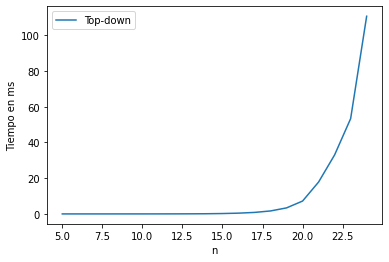

In [8]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy
import random

x=[]
y_topdown = []

for n in range(5,25):

  precio = cutrod_instance_generator(n)
  largo = len(precio)

  t_topdown = repeat(setup="from __main__ import cutRod", stmt=f"cutRod({precio},{largo})", repeat=1, number=10)

  x.append(n)
  y_topdown.append(t_topdown)


plt.plot(x,y_topdown)

plt.legend(["Top-down"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

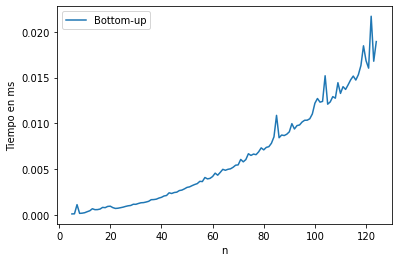

In [7]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy
import random

x=[]
y_bottomup = []

for n in range(5,125):

  precio = cutrod_instance_generator(n)
  largo = len(precio)

  t_bottomup = repeat(setup="from __main__ import bottom_up", stmt=f"bottom_up({precio},{largo})", repeat=1, number=10)

  x.append(n)
  y_bottomup.append(t_bottomup)

plt.plot(x,y_bottomup)

plt.legend(["Bottom-up"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### Analisis del grafico

Por lo que se ve Top-Down es muchísimo más lento que Bottom-up, viendo como con 124 como tamaño, Bottom-up es más rápido que Top-Down con uno de tamaño 22, eso es porque como dijimos anteriormente el tiempo de ejecución es:

* Top-Down :$Θ(2^n)$
* Bottom-up : $Θ(n^2)$

La función $2^n$ crece muchísimo más rápido que $n^2$ por lo que por ejemplo:

* Bottom-up con $n = 124$  da como resultado $124^2 = 2976$.

* Top-Down con $n = 22$ da como resultado $2^{22} = 4194304$.

Como conclusión tenemos que Bottom-up como algoritmo es muchísimo más eficiente y rápido que Top-Down.

### 6.1 Grafica de los sub-problemas en el Bottom-up

Mostraremos cuantos sub-problemas, resuelve el algoritmo bottom-up para resolver el problema principal

Teniendo precios con valores al azar con tamaño desde 5 hasta 200

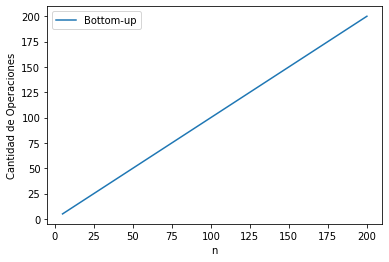

In [16]:
import matplotlib.pyplot as plt
import math

y_bottom=[]; 
x=[n for n in range(5,201)]

for n in range(5,201):
  subProblemas = 0
  precio = cutrod_instance_generator(n)
  largo = len(precio)
  a = bottom_up(precio, largo)
  y_bottom.append(subProblemas)

plt.plot(x,y_bottom)
plt.legend(["Bottom-up"])

plt.xlabel('n')
plt.ylabel('Cantidad de Operaciones')
plt.show()

#### Analisis del Grafico

Como habíamos dicho en el tiempo de ejecucion del Bottom-up para resolver el problema principal, este algoritmo debe resolver los $n$ sub-problemas, o sea debe resolver el mismo problema para cada longitud de la varilla, desde 1 hasta $n - 1$, para sí resolver el problema en n.